In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**Asylum Seeker dataset for EDA, Classification, Regression and Cluster Analysis**

**EDA ON PREPROCESSED DATASET OF ASYLUM SEEKERS**

In [24]:
asylum_seekers_processed = pd.read_csv('/data/processed_asylum_seekers.csv')

In [25]:
asylum_seekers_processed.year

0         2000
1         2000
2         2000
3         2000
4         2000
          ... 
129715    2016
129716    2016
129717    2016
129718    2016
129719    2016
Name: year, Length: 129720, dtype: int64

**Understanding the asylum seekers of Syrian Refugees to countries of residence would help the UNHCR better understand the how best to allocate resources**

In [26]:
%load_ext autoreload
%autoreload 1

import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from IPython.display import display 

plt.style.use('ggplot')

%matplotlib inline

In [27]:
# How many unique countries of residence are there?
len(asylum_seekers_processed.country_of_residence.unique())

189

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


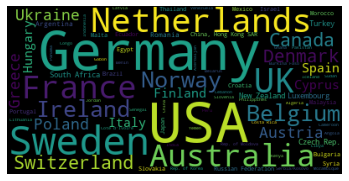

In [29]:
data = asylum_seekers_processed['country_of_residence'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [30]:
# How many unique countries of origin are there?
len(asylum_seekers_processed.country_of_origin.unique())

221

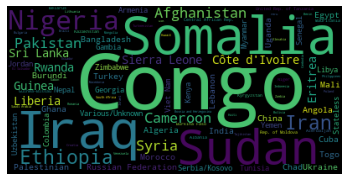

In [31]:
### WORD CLOUD BASED ON THE COUNTRY OF ORIGIN ####
data_origin = asylum_seekers_processed['country_of_origin'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(data_origin)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [32]:
# Filter seekers by year
seekers_2000 = asylum_seekers_processed.query('year == 2016')
seekers_2016 = asylum_seekers_processed.query('year == 2010')

In [33]:
# plotly
import plotly.io as pio
import plotly.express as px

fig = px.bar(
    asylum_seekers_processed,
    x="year",
    y=["total_applied_during_year","total_rejected"],
    title="Decisions on Refugees on Yearly basis",
    barmode="group",
    labels={"value": "Count of Refugees"},
)
fig.show()

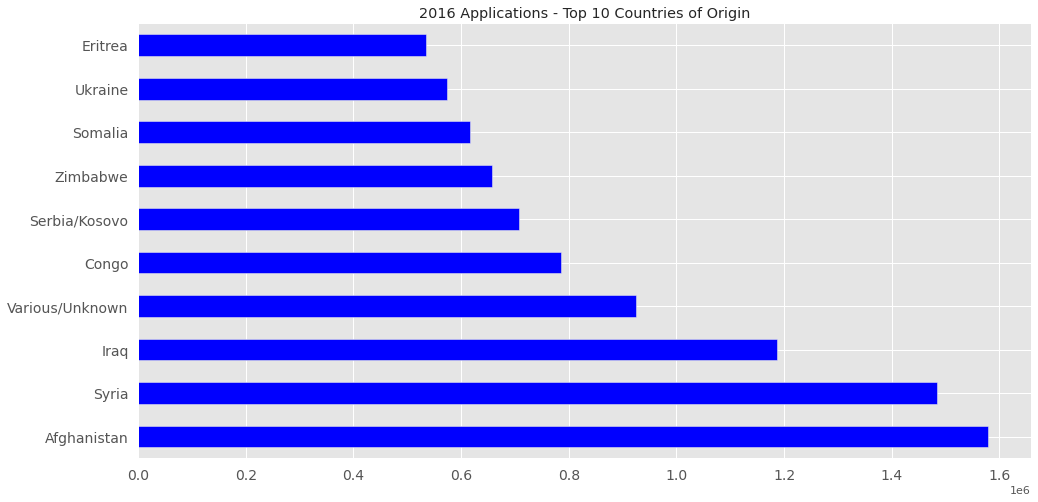

In [34]:
# Top 10 countries of origin in 2016
sums_2016 = asylum_seekers_processed.groupby(['country_of_origin'])[['total_applied_during_year']].aggregate('sum')
top_10_countries_of_origin_2016 = sums_2016.total_applied_during_year.sort_values(ascending=False)[:10]
chart_2016 = top_10_countries_of_origin_2016.plot.barh(
    figsize = [16, 8], 
    fontsize = 14, 
    title = '2016 Applications - Top 10 Countries of Origin', 
    color = 'blue')
chart_2016.set_ylabel('')
chart_2016

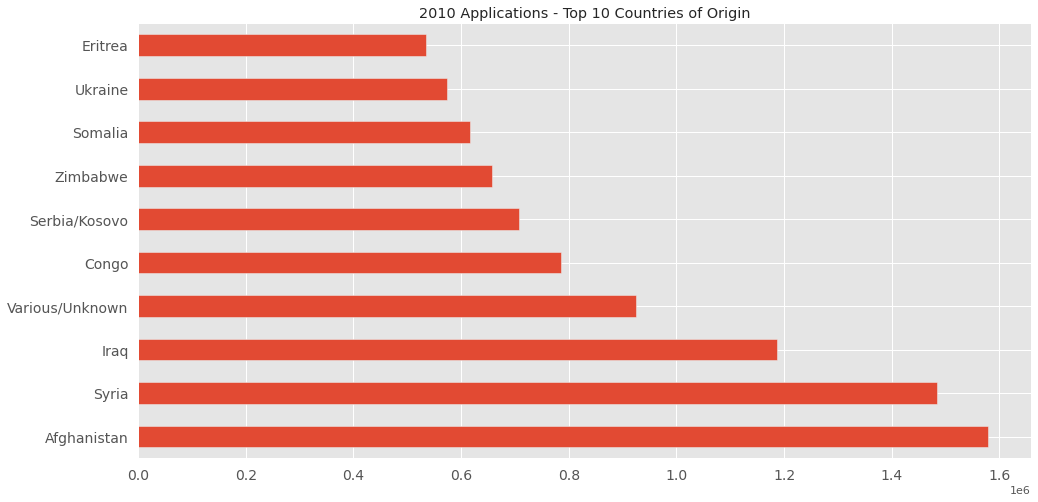

In [35]:
# Top 10 countries of origin in 2016

sums_2010 = asylum_seekers_processed.groupby(['country_of_origin'])[['total_applied_during_year']].aggregate('sum')
top_10_countries_of_origin_2010 = sums_2010.total_applied_during_year.sort_values(ascending=False)[:10]
chart_2010 = top_10_countries_of_origin_2010.plot.barh(
    figsize = [16, 8],
    fontsize = 14,
    title = '2010 Applications - Top 10 Countries of Origin')
chart_2010.set_ylabel('')
chart_2010

In [36]:
### Counts of Asylum seekers based on the year ####
asylum_seekers_processed.year.value_counts()

2015    11225
2016    10461
2014     9908
2013     9259
2012     8644
2011     8299
2010     7905
2009     7159
2008     7042
2007     6924
2005     6721
2006     6656
2004     6601
2003     6359
2002     5862
2001     5542
2000     5153
Name: year, dtype: int64

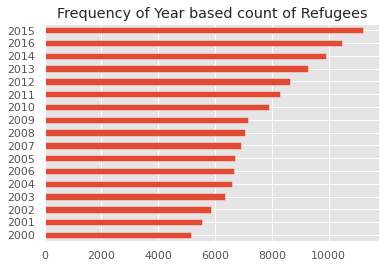

2015    0.086533
2016    0.080643
2014    0.076380
2013    0.071377
2012    0.066636
2011    0.063976
2010    0.060939
2009    0.055188
2008    0.054286
2007    0.053377
2005    0.051812
2006    0.051311
2004    0.050887
2003    0.049021
2002    0.045190
2001    0.042723
2000    0.039724
Name: year, dtype: float64

In [37]:
asylum_seekers_processed["year"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Year based count of Refugees")
plt.show()
asylum_seekers_processed['year'].value_counts() / len(asylum_seekers_processed)

Since there are several changes in application trends between 2010 and 2016, it would be interesting to plot countries changes over the 6 years. Let's start by selecting a handful of countries of interest. To start with, we will check the Syrian Country


**Syrian Refugee Destinations**


In [38]:
# Create Syrian datafame
syrian = asylum_seekers_processed.query("country_of_origin == 'Syria'")

In [39]:
# Number of records
len(syrian)

1826

In [40]:
# Number of countries of residence
len(syrian.country_of_residence.unique())

151

Text(0.5, 1.0, 'Top 10 Countries of Residence for Syrian Refugees')

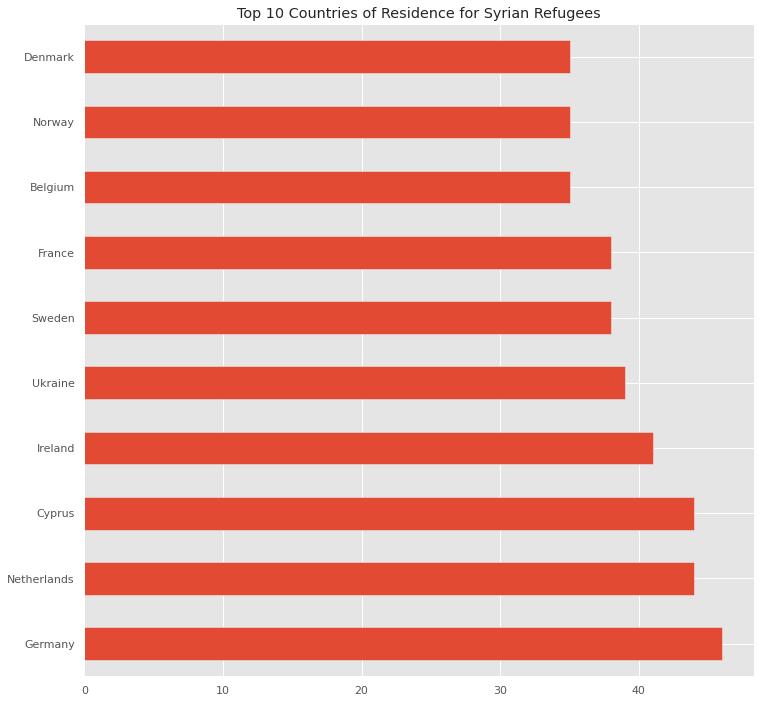

In [41]:
country_counts = syrian['country_of_residence'].value_counts()
top_10_countries_of_residence = country_counts.sort_values(ascending=False)[:10]
top_10 = top_10_countries_of_residence.plot.barh(figsize =(12,12))
top_10.set_title('Top 10 Countries of Residence for Syrian Refugees')

**Asylum seekers Monthly Distribution of Data:**

In [42]:
data_monthly = pd.read_csv('/data/asylum_seekers_monthly.csv',low_memory=False)

In [43]:
data_monthly.head()

Country / territory of asylum/residence       Origin  Year     Month Value
0                               Australia  Afghanistan  1999   January     8
1                               Australia  Afghanistan  1999  February    10
2                               Australia  Afghanistan  1999     March    25
3                               Australia  Afghanistan  1999     April    25
4                               Australia  Afghanistan  1999       May     7

In [44]:
data_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332189 entries, 0 to 332188
Data columns (total 5 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Country / territory of asylum/residence  332189 non-null  object
 1   Origin                                   332189 non-null  object
 2   Year                                     332189 non-null  int64 
 3   Month                                    332189 non-null  object
 4   Value                                    332189 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.7+ MB


In [45]:
data_monthly['Value'] = pd.to_numeric(data_monthly['Value'], errors='coerce')

In [46]:
data_monthly['Origin']=data_monthly['Origin'].astype('category')
data_monthly['Month']=data_monthly['Month'].astype('category')
data_monthly['Origin'].replace({'Iran (Islamic Rep. of)':'Iran','Syrian Arab Rep.':'Syria','Russian Federation':'Russia','Dem. Rep. of the Congo':'Congo Rep. '},inplace=True)
data_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332189 entries, 0 to 332188
Data columns (total 5 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   Country / territory of asylum/residence  332189 non-null  object  
 1   Origin                                   332189 non-null  object  
 2   Year                                     332189 non-null  int64   
 3   Month                                    332189 non-null  category
 4   Value                                    320348 non-null  float64 
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 10.5+ MB


In [47]:
data_monthly.describe(include='all')


Country / territory of asylum/residence  Origin           Year   Month  \
count                                   332189  332189  332189.000000  332189   
unique                                      45     205            NaN      12   
top                                     Canada    Iraq            NaN   March   
freq                                     25693    6367            NaN   28868   
mean                                       NaN     NaN    2008.059463     NaN   
std                                        NaN     NaN       5.243479     NaN   
min                                        NaN     NaN    1999.000000     NaN   
25%                                        NaN     NaN    2004.000000     NaN   
50%                                        NaN     NaN    2008.000000     NaN   
75%                                        NaN     NaN    2013.000000     NaN   
max                                        NaN     NaN    2017.000000     NaN   

                Value  
count   320348.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean        33.907822  
std        262.833617  
min          0.000000  
25%          2.000000  
50%          5.000000  
75%         18.000000  
max      36860.000000

In [48]:
data_monthly = data_monthly.rename(columns={'Country / territory of asylum/residence':'Country'})

In [49]:
data_monthly.head()

Country       Origin  Year     Month  Value
0  Australia  Afghanistan  1999   January    8.0
1  Australia  Afghanistan  1999  February   10.0
2  Australia  Afghanistan  1999     March   25.0
3  Australia  Afghanistan  1999     April   25.0
4  Australia  Afghanistan  1999       May    7.0

In [50]:
!pip install plotly

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import plotly.express as px

fig = px.bar(data_monthly, x='Month', y='Value', color='Origin')
fig.show()

In [52]:
print('Number of distinct countries in the sample : ',len(data_monthly.Origin.unique()))

Number of distinct countries in the sample :  205


In [53]:
## Grouping asylum seekers based on the origin
print('Total groups of asylum seekers per origin')
print('-------------------------------------')
print(data_monthly['Origin'].value_counts()[:10])

Total groups of asylum seekers per origin
-------------------------------------
Iraq           6367
Iran           6207
Afghanistan    6122
Pakistan       6109
Nigeria        5844
Russia         5707
Syria          5641
Turkey         5397
Somalia        5302
China          5160
Name: Origin, dtype: int64


In [54]:
data_monthly.head()

Country       Origin  Year     Month  Value
0  Australia  Afghanistan  1999   January    8.0
1  Australia  Afghanistan  1999  February   10.0
2  Australia  Afghanistan  1999     March   25.0
3  Australia  Afghanistan  1999     April   25.0
4  Australia  Afghanistan  1999       May    7.0

In [55]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.3 MB/s 
     |████████████████████████████████| 16.6 MB 38.9 MB/s 
     |████████████████████████████████| 7.8 MB 60.0 MB/s 


In [56]:
data_monthly.columns

Index(['Country', 'Origin', 'Year', 'Month', 'Value'], dtype='object')

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import geopandas
import folium
sns.set(style="darkgrid")
total_values=data_monthly.groupby('Origin').sum().drop('Year',axis=1)


total_values.sort_values(by='Value',inplace=True,ascending=False)

matplotlib.rcParams.update({'font.size': 20})

In [58]:
total_values

Value
Origin                                         
Syria                                 1027453.0
Afghanistan                            952542.0
Iraq                                   900244.0
Serbia and Kosovo: S/RES/1244 (1999)   632975.0
China                                  421080.0
...                                         ...
Gibraltar                                   7.0
New Caledonia                               7.0
Puerto Rico                                 6.0
Micronesia (Federated States of)            6.0
Luxembourg                                  5.0

[205 rows x 1 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



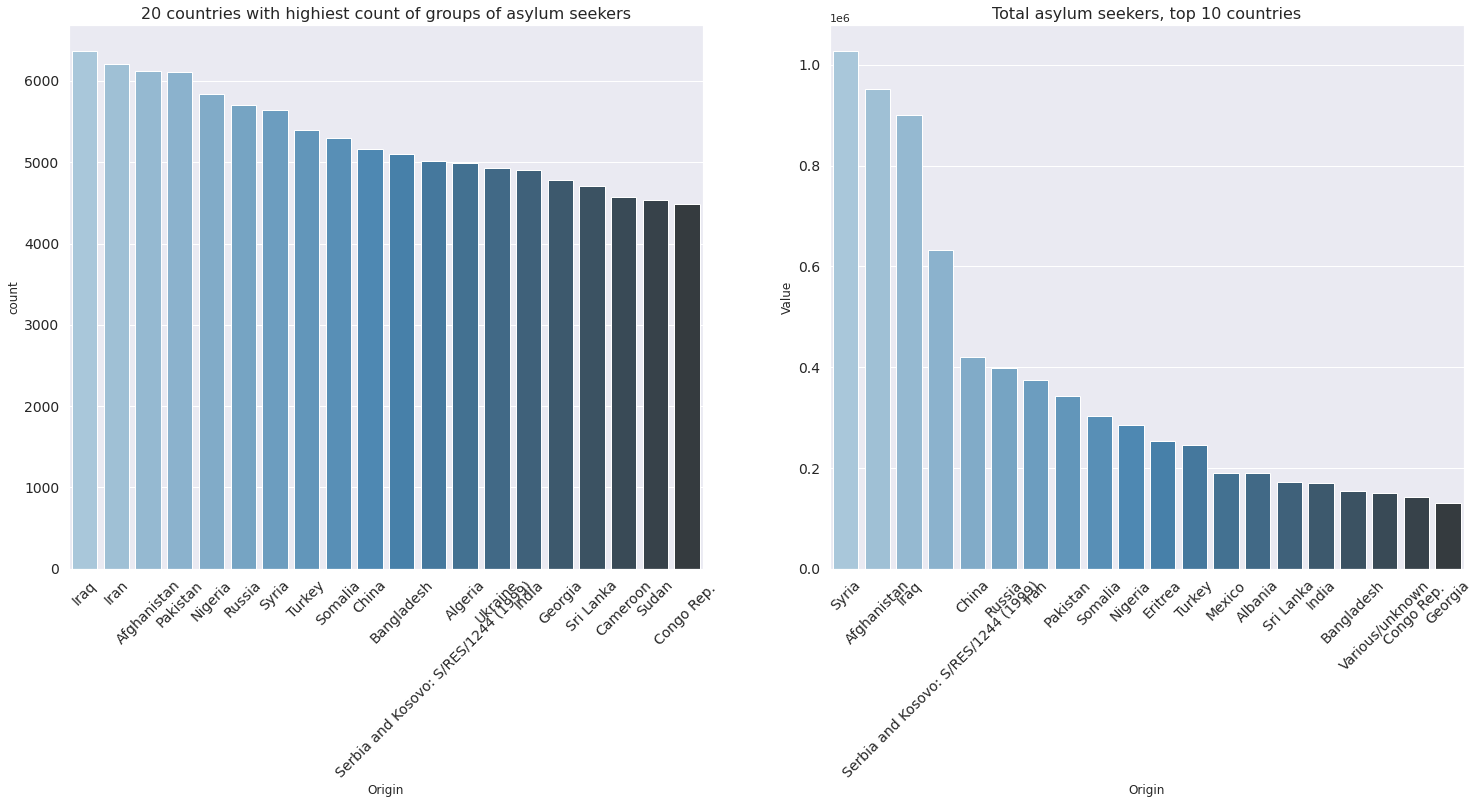

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(data_monthly['Origin'],order=pd.value_counts(data_monthly['Origin']).iloc[:20].index,palette="Blues_d",ax=axs[0])
sns.barplot(x=total_values[0:20].index,y=total_values['Value'][0:20],palette="Blues_d",ax=axs[1])
axs[0].set_title('20 countries with highiest count of groups of asylum seekers',fontsize=16 )
axs[1].set_title('Total asylum seekers, top 10 countries',fontsize=16)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(size=14,rotation=45)
    plt.yticks(size=14,)
plt.show()

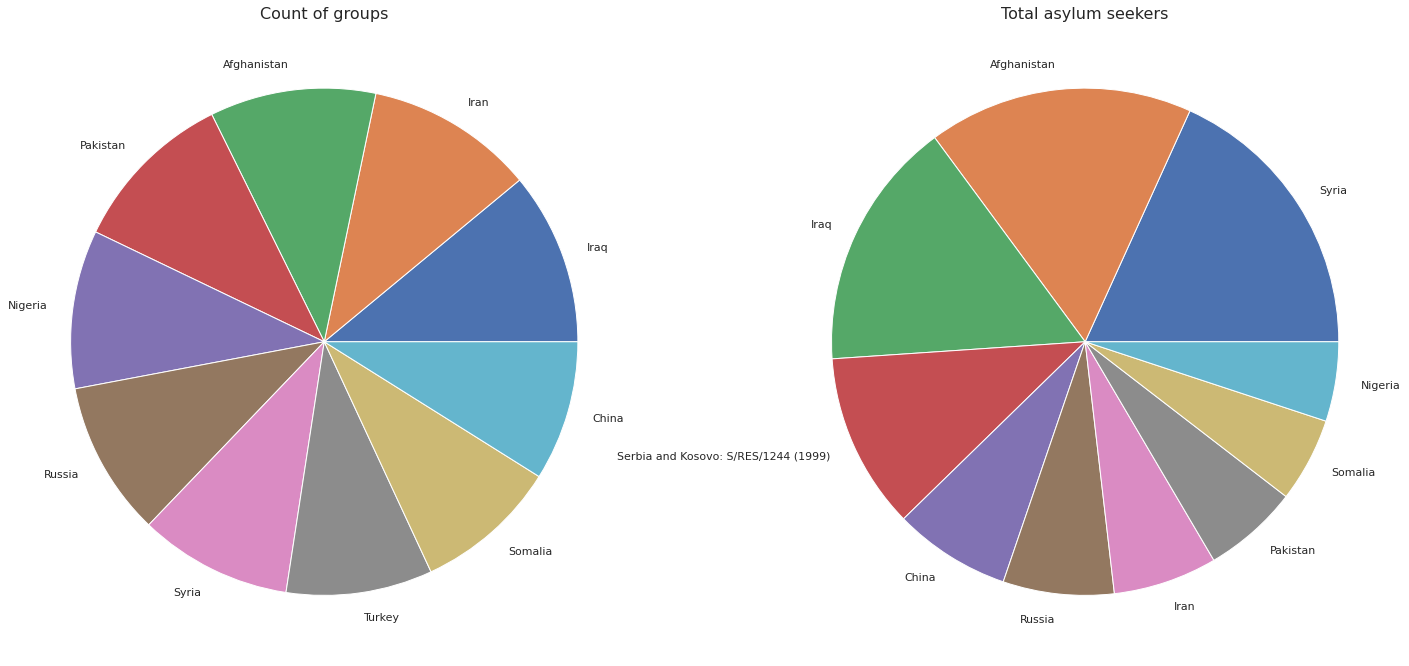

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(25, 15))
data_monthly['Origin'].value_counts()[:10].plot(kind='pie',ax=axs[0])
data_monthly.Value.groupby(data_monthly.Origin).sum().sort_values(ascending=False)[:10].plot(kind='pie',ax=axs[1])
axs[0].set_title('Count of groups',fontsize=16)
axs[0].set_ylabel('')
axs[1].set_title('Total asylum seekers',fontsize=16)
axs[1].set_ylabel('')
plt.show()

In [61]:
# DATA PLOT IN GEOGRAPHICAL PLOTS
import geopandas as gpd

world = gpd.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.to_crs('EPSG:27700')
world['centroid_col']=world.centroid
origin_counts=data_monthly['Origin'].value_counts()
top_origin_counts=origin_counts.nlargest(10)
top_countries=world[world['name'].isin(list(top_origin_counts.keys()))]

In [62]:
all_countries=world.loc[world['name'].isin(list(data_monthly['Origin']))]
all_countries.reset_index(drop=True, inplace=True)
all_countries.set_index('name',inplace=True)
for country in all_countries.index:
    all_countries.loc[country,'sum']=total_values.loc[country].values[0]

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



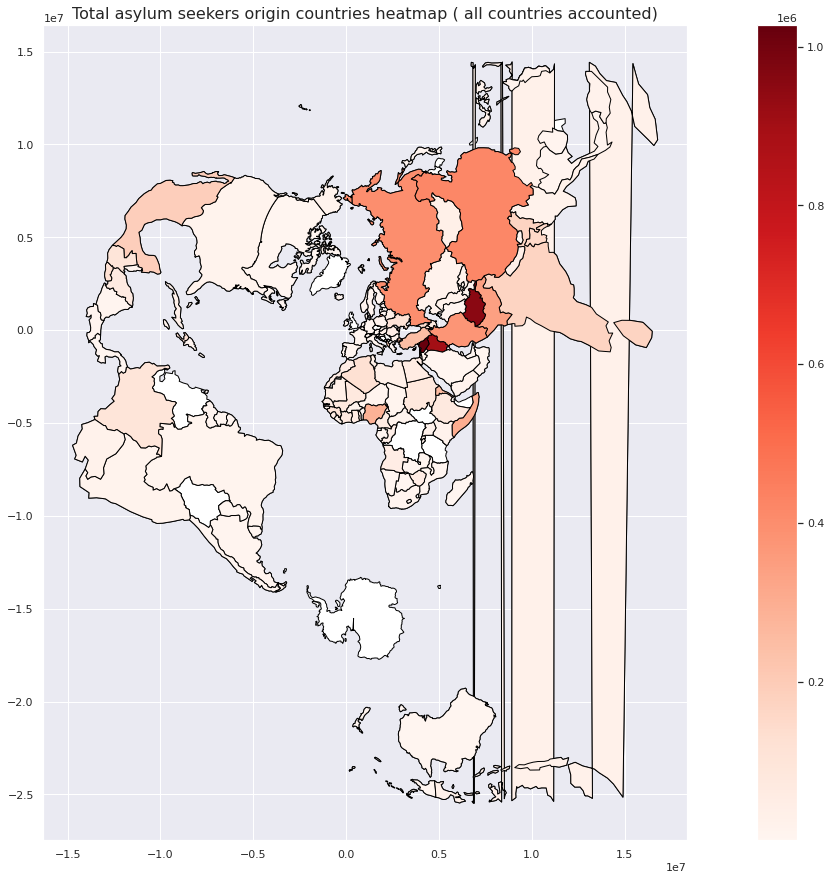

In [63]:
fig, ax = plt.subplots(figsize=(25,15))
plt.title('Total asylum seekers origin countries heatmap ( all countries accounted)',fontsize=16)
world.plot(ax=ax, color='white', edgecolor='black')
all_countries.plot(column='sum',legend='True',ax=ax, edgecolor='black',cmap='Reds')
plt.show()

In [64]:
top_countries=world[world['name'].isin(list(origin_counts.nlargest(20).keys()))]


In [65]:
import folium


In [66]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
all_countries

pop_est      continent iso_a3  gdp_md_est  \
name                                                                      
Fiji                         889953.0        Oceania    FJI        5496   
Canada                     37589262.0  North America    CAN     1736425   
United States of America  328239523.0  North America    USA    21433226   
Kazakhstan                 18513930.0           Asia    KAZ      181665   
Uzbekistan                 33580650.0           Asia    UZB       57921   
...                               ...            ...    ...         ...   
Djibouti                     973560.0         Africa    DJI        3324   
Uganda                     44269594.0         Africa    UGA       35165   
Rwanda                     12626950.0         Africa    RWA       10354   
Montenegro                   622137.0         Europe    MNE        5542   
Trinidad and Tobago         1394973.0  North America    TTO       24269   

                                                                   geometry  \
name                                                                          
Fiji                      MULTIPOLYGON (((186070.573 -23744062.100, 1866...   
Canada                    MULTIPOLYGON (((-3672356.772 7146322.148, -366...   
United States of America  MULTIPOLYGON (((-3672356.772 7146322.148, -382...   
Kazakhstan                POLYGON ((5385177.587 4408588.224, 5481515.942...   
Uzbekistan                POLYGON ((5205512.422 1006376.624, 4818213.643...   
...                                                                     ...   
Djibouti                  POLYGON ((5718803.312 -3611174.610, 5784162.98...   
Uganda                    POLYGON ((4686880.239 -5656911.640, 4409983.51...   
Rwanda                    POLYGON ((4217294.969 -5675816.667, 4268608.12...   
Montenegro                POLYGON ((2213602.439 -569578.209, 2194115.517...   
Trinidad and Tobago       POLYGON ((-7578744.343 -3227974.380, -7457716....   

                                               centroid_col      sum  
name                                                                  
Fiji                       POINT (339579.888 -23606930.300)   8063.0  
Canada                     POINT (-3154172.924 4623191.258)    468.0  
United States of America   POINT (-5761126.296 5313283.083)  13738.0  
Kazakhstan                  POINT (5078411.261 2593826.087)  19795.0  
Uzbekistan                  POINT (5715362.532 1714899.808)  21744.0  
...                                                     ...      ...  
Djibouti                   POINT (5764455.606 -3720847.177)   5112.0  
Uganda                     POINT (4480648.825 -5350284.369)  19990.0  
Rwanda                     POINT (4150156.438 -5789188.372)  26030.0  
Montenegro                  POINT (2143161.395 -564721.966)  11176.0  
Trinidad and Tobago       POINT (-7531495.556 -3316334.949)   2647.0  

[147 rows x 7 columns]

In [68]:
data_monthly.Origin

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
332184       Zimbabwe
332185       Zimbabwe
332186       Zimbabwe
332187       Zimbabwe
332188       Zimbabwe
Name: Origin, Length: 332189, dtype: object

In [69]:
map=folium.Map([37.993670, 23.731474], zoom_start=3)
folium.Marker([37.993670, 23.731474], popup='<i>Greece</i>',icon=folium.Icon(color='green', icon='home')).add_to(map)

for index, row in all_countries.iterrows():
   folium.Circle(
      location=[row['centroid_col'].y,row['centroid_col'].x],
      tooltip=row.name,
      popup=row['sum'],
      radius=row['sum']*12,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map)
map

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



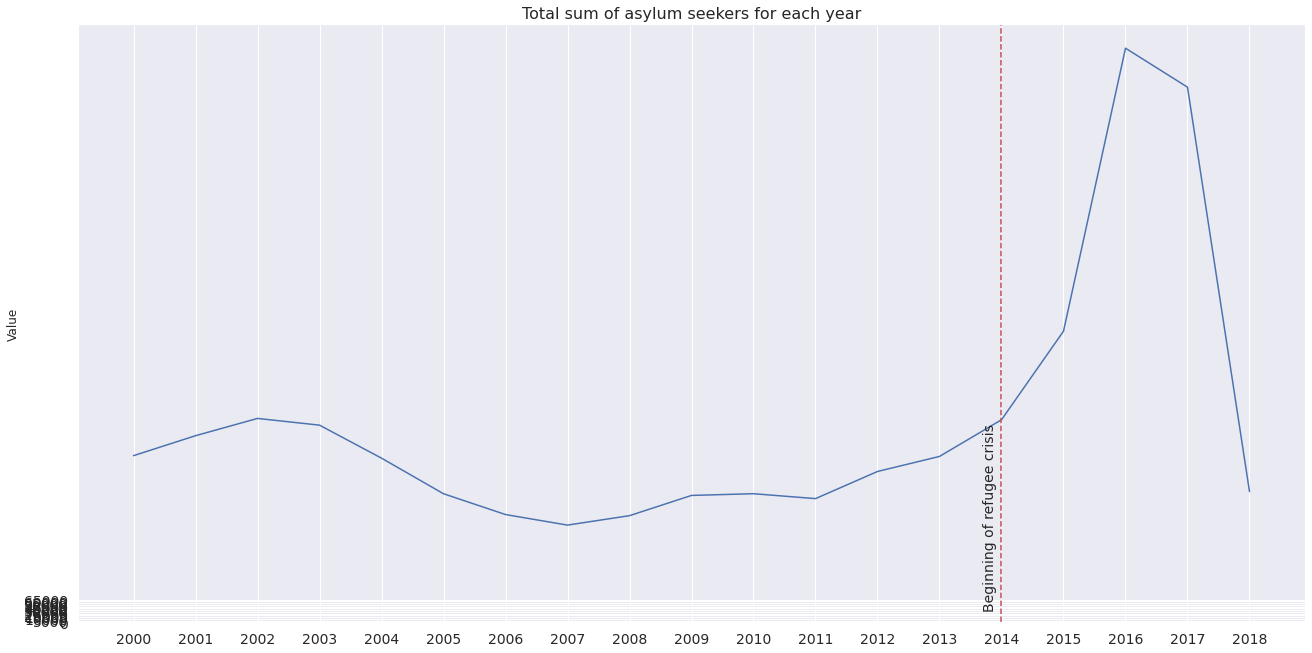

In [70]:
plt.figure(figsize=(22,11))
sns.lineplot(np.arange(2000,2019,1),data_monthly.groupby('Year').sum()['Value'])
plt.grid()
plt.xticks(np.arange(2000,2019,1),fontsize=14)
plt.yticks(np.arange(0,70000,5000),fontsize=14)
plt.title('Total sum of asylum seekers for each year',fontsize=16)
plt.axvline(x=2014,color='r',linestyle='--')
plt.text(2013.7,40000,'Beginning of refugee crisis',rotation=90,fontsize=14)
plt.grid()
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



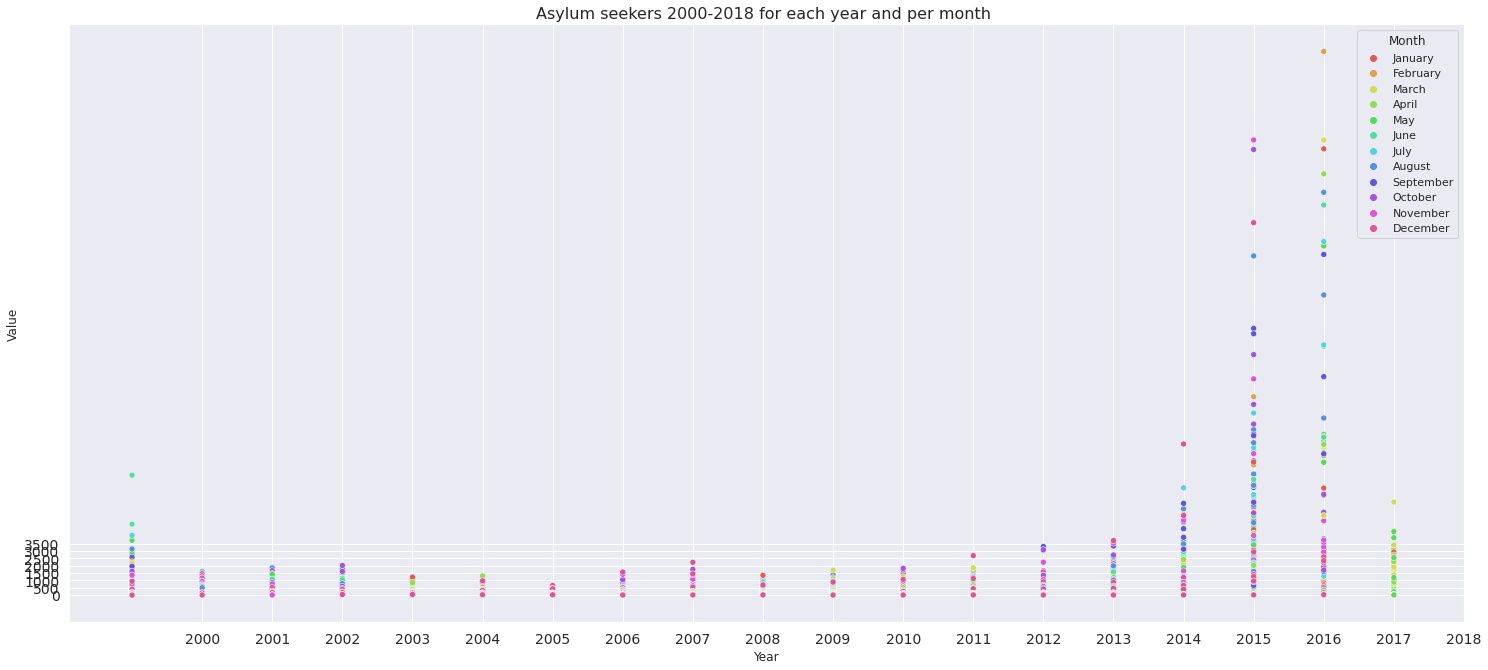

In [71]:
plt.figure(figsize=(25,11))
order=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.scatterplot(data_monthly.Year,data_monthly.Value,hue=data_monthly.Month,hue_order=order,palette=sns.color_palette("hls", 12))
plt.xticks(np.arange(2000,2019,1),fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)
plt.title('Asylum seekers 2000-2018 for each year and per month ',fontsize=16)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



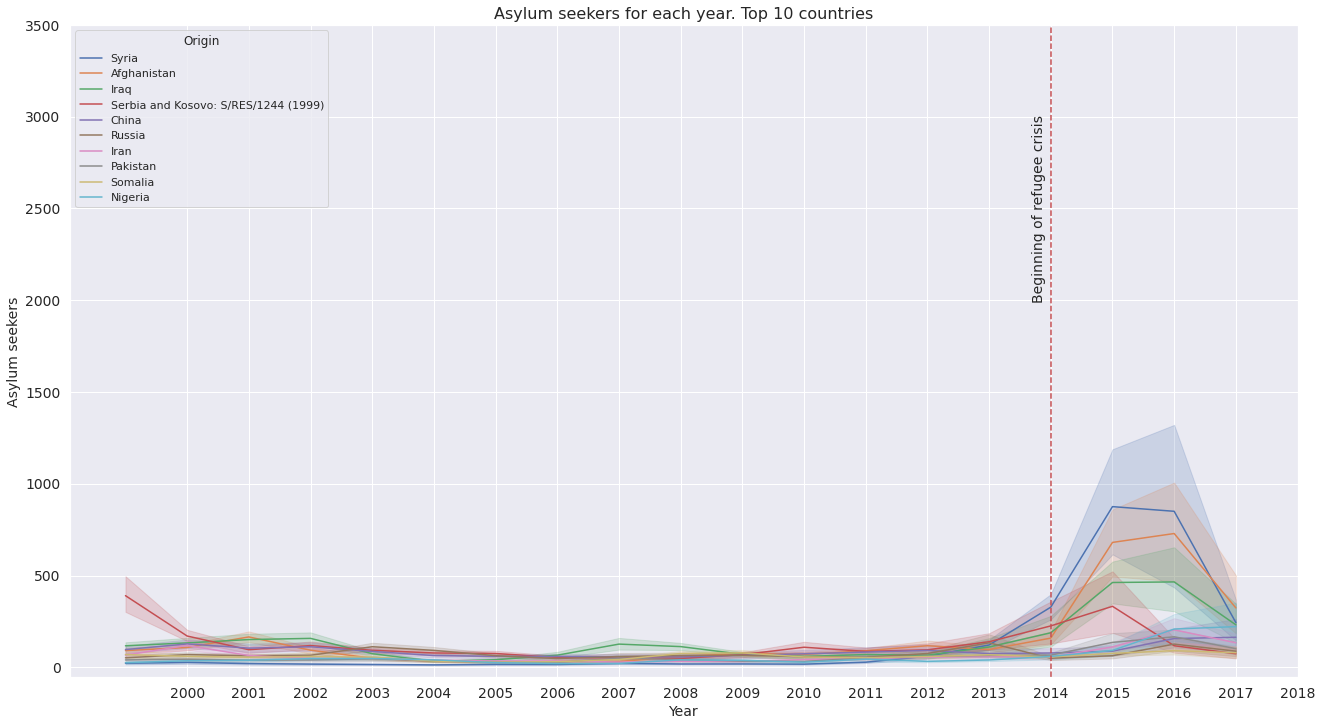

In [72]:
top_data=data_monthly[data_monthly.Origin.isin(total_values[:10].index)]
plt.figure(figsize=(22,12))
plt.title('Asylum seekers for each year. Top 10 countries',fontsize=16)
sns.lineplot(top_data.Year,top_data.Value,hue=top_data.Origin,hue_order=total_values[:10].index)
plt.xticks(np.arange(2000,2019,1),fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Asylum seekers',fontsize=14)
plt.axvline(x=2014,color='r',linestyle='--')
plt.text(2013.7,2000,'Beginning of refugee crisis',rotation=90,fontsize=14)
plt.show()

In [73]:
group1=data_monthly[data_monthly['Origin'].isin(['Afghanistan','Pakistan','Iraq'])]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



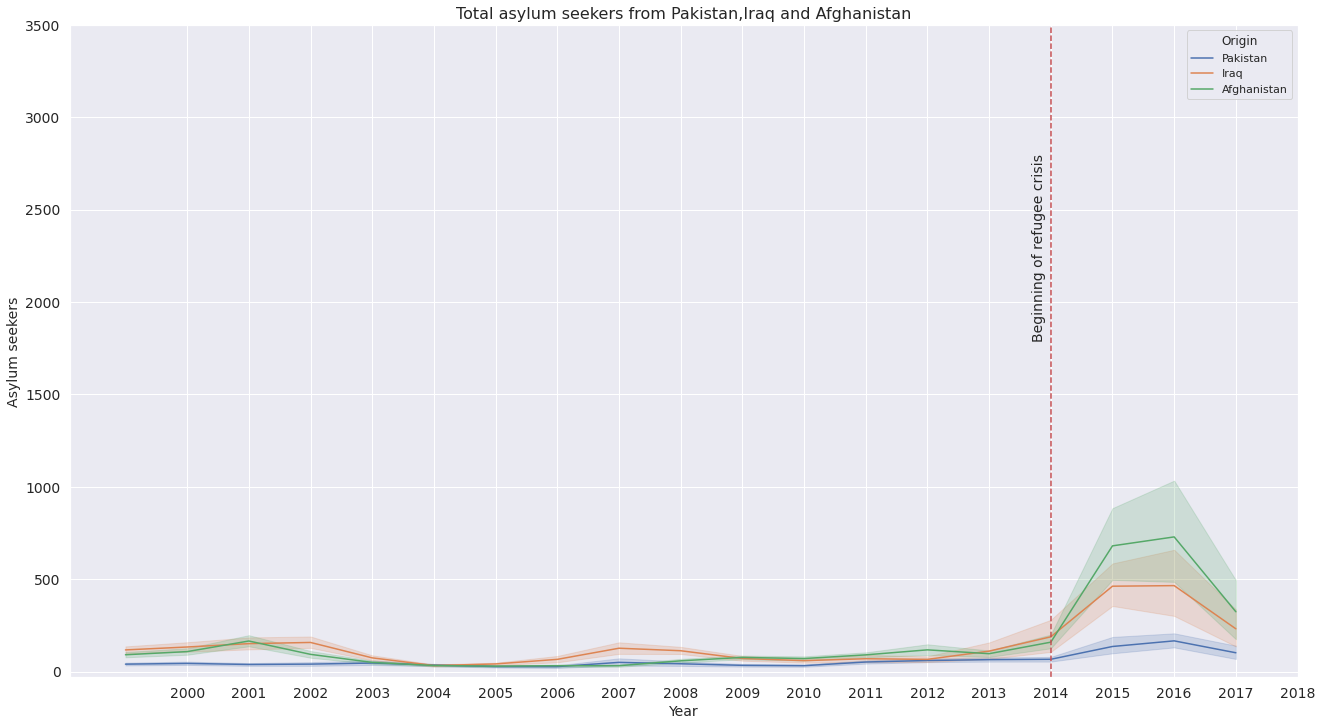

In [74]:
plt.figure(figsize=(22,12))
plt.title('Total asylum seekers from Pakistan,Iraq and Afghanistan',fontsize=16)
sns.lineplot(group1.Year,group1.Value,hue=group1.Origin,hue_order=['Pakistan','Iraq','Afghanistan'])
plt.xlabel('Year',fontsize=14)
plt.ylabel('Asylum seekers',fontsize=14)
plt.xticks(np.arange(2000,2019,1),fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)

plt.axvline(x=2014,color='r',linestyle='--')
plt.text(2013.7,1800,'Beginning of refugee crisis',rotation=90,fontsize=14)
plt.show()

In [75]:
data_monthly['period']=data_monthly['Year']
data_monthly.loc[data_monthly['Year']<2014,'period']='before'
data_monthly.loc[data_monthly['Year']>=2014,'period']='after'

data_monthly['period']=data_monthly['period'].astype('category')
data_monthly['period'].cat.reorder_categories(['before', 'after'], inplace=True)
period_sums=data_monthly.groupby('period')['Value'].sum()

<ipython-input-75-c92aa8a9f5b3>:6: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.



Asylum seekers groups count:
before    266614
after      65575
Name: period, dtype: int64
------------------------
Total asylum seekers:
period
before    6471764.0
after     4390539.0
Name: Value, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



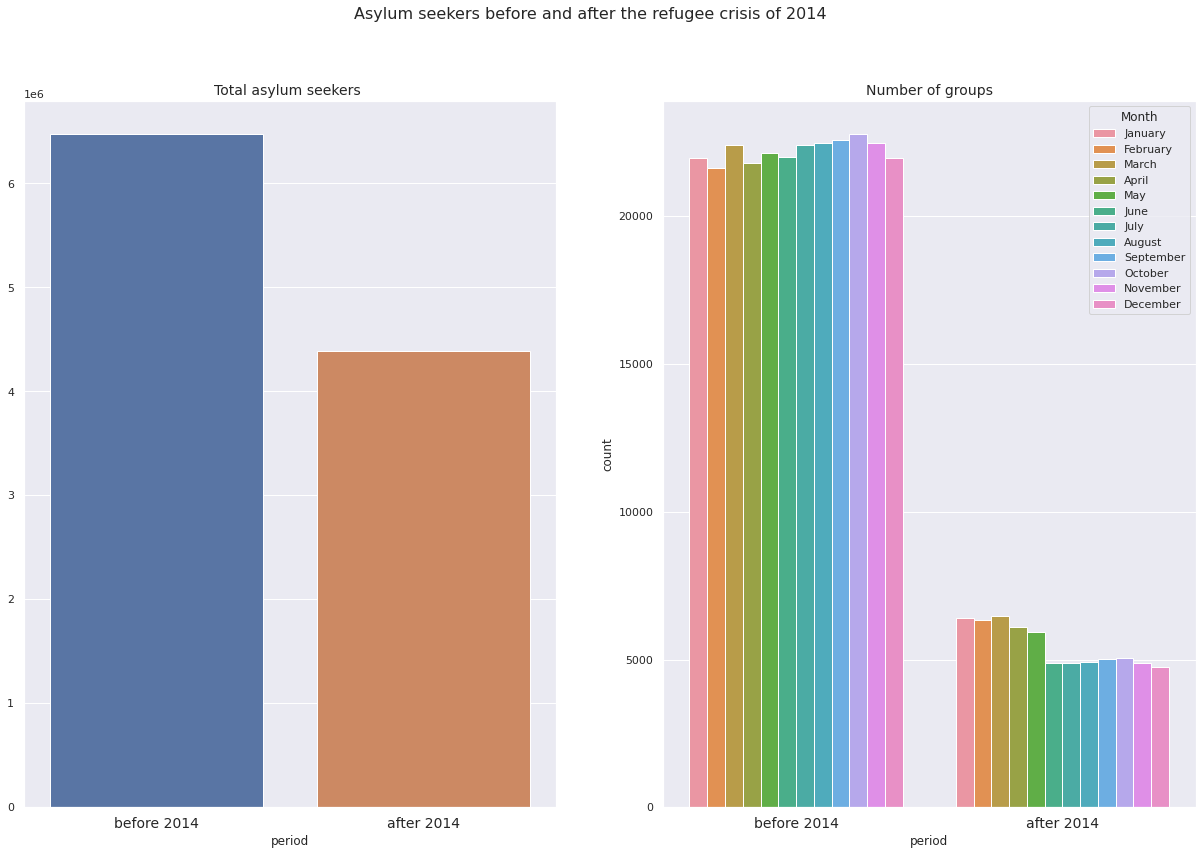

In [76]:
print('Asylum seekers groups count:')
print(data_monthly['period'].value_counts())
print('------------------------')
print('Total asylum seekers:')
print(period_sums)

fig, axs = plt.subplots(1, 2, figsize=(21, 13))
sns.barplot(period_sums.index,period_sums.values,ax=axs[0])
plt.suptitle('Asylum seekers before and after the refugee crisis of 2014',fontsize=16)
axs[0].set_title('Total asylum seekers ',fontsize=14)
axs[0].set_xticklabels(['before 2014','after 2014'],fontsize=14)
order=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(data_monthly['period'],ax=axs[1],hue=data_monthly['Month'],hue_order=order)
axs[1].set_title('Number of groups',fontsize=14)
axs[1].set_xticklabels(['before 2014','after 2014'],fontsize=14)
plt.show()

In [77]:
top_data=data_monthly[data_monthly['Origin'].isin(total_values[:10].index)]
top_data.reset_index(drop=True, inplace=True)

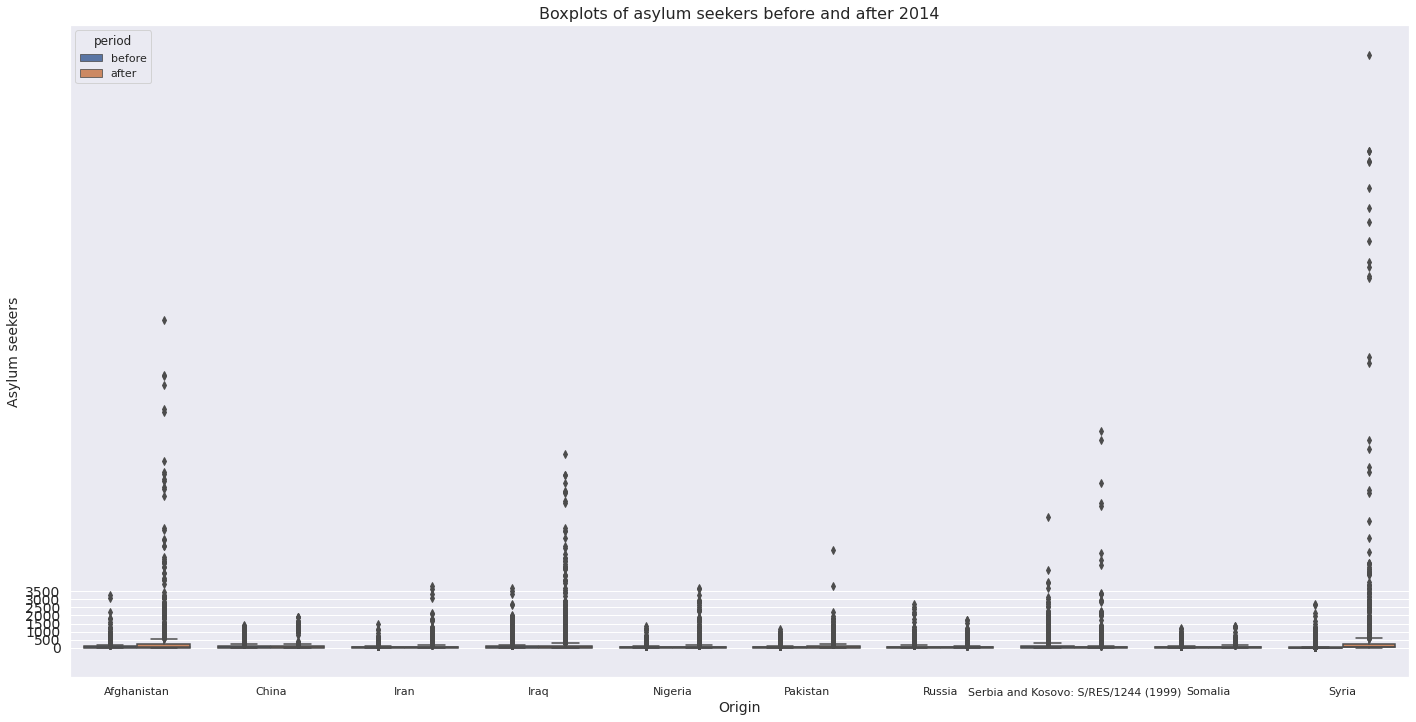

In [78]:
plt.figure(figsize=(24,12))
sns.boxplot(x="Origin",y="Value",hue="period",data=top_data)
plt.title('Boxplots of asylum seekers before and after 2014',fontsize=16)
plt.xlabel('Origin',fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)
plt.ylabel('Asylum seekers',fontsize=14)
plt.show()


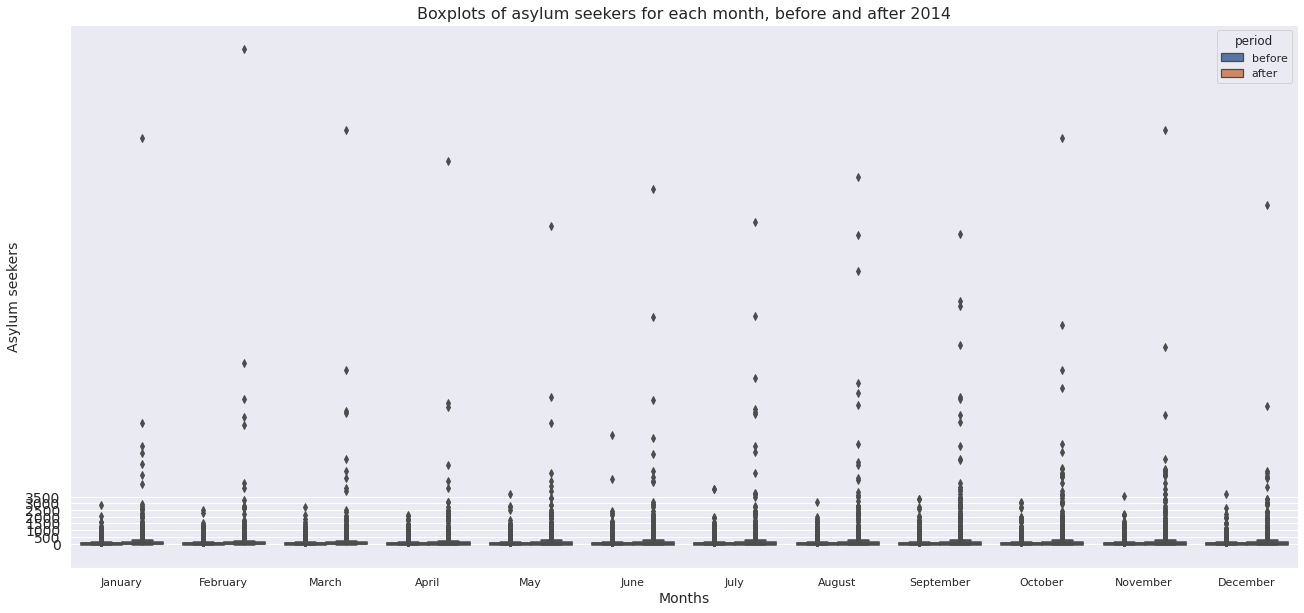

In [79]:
plt.figure(figsize=(22,10))
sns.boxplot(x="Month",y="Value",hue="period",data=top_data,order=order, linewidth=2.5)
plt.title('Boxplots of asylum seekers for each month, before and after 2014',fontsize=16)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Asylum seekers',fontsize=14)
plt.yticks(np.arange(0,4000,500),fontsize=14)

plt.show()

**CLUSTERING** ALGORITHMS APPLIED ON THE MONTHLY DATA

In [80]:
data_monthly.head()

Country       Origin  Year     Month  Value  period
0  Australia  Afghanistan  1999   January    8.0  before
1  Australia  Afghanistan  1999  February   10.0  before
2  Australia  Afghanistan  1999     March   25.0  before
3  Australia  Afghanistan  1999     April   25.0  before
4  Australia  Afghanistan  1999       May    7.0  before

In [81]:
data_monthly = data_monthly.dropna()

In [82]:
# 3 Non-numeric datatype and 1 Numeric type
X = data_monthly



In [83]:
# Convert Categorical data into integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Country'] = le.fit_transform(X['Country'])
X['Month'] = le.fit_transform(X['Month'])
X['Origin'] = le.fit_transform(X['Origin'])



In [84]:
X.head

<bound method NDFrame.head of         Country  Origin  Year  Month  Value  period
0             1       0  1999      4    8.0  before
1             1       0  1999      3   10.0  before
2             1       0  1999      7   25.0  before
3             1       0  1999      0   25.0  before
4             1       0  1999      8    7.0  before
...         ...     ...   ...    ...    ...     ...
332184       43     204  2016      2   28.0   after
332185       43     204  2017      3   27.0   after
332186       43     204  2017      7   42.0   after
332187       43     204  2017      0   16.0   after
332188       43     204  2017      8   12.0   after

[320348 rows x 6 columns]>

In [85]:
y = X['Origin']
y

0           0
1           0
2           0
3           0
4           0
         ... 
332184    204
332185    204
332186    204
332187    204
332188    204
Name: Origin, Length: 320348, dtype: int64

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320348 entries, 0 to 332188
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   Country  320348 non-null  int64   
 1   Origin   320348 non-null  int64   
 2   Year     320348 non-null  int64   
 3   Month    320348 non-null  int64   
 4   Value    320348 non-null  float64 
 5   period   320348 non-null  category
dtypes: category(1), float64(1), int64(4)
memory usage: 15.0 MB


In [87]:
X.head()

Country  Origin  Year  Month  Value  period
0        1       0  1999      4    8.0  before
1        1       0  1999      3   10.0  before
2        1       0  1999      7   25.0  before
3        1       0  1999      0   25.0  before
4        1       0  1999      8    7.0  before

In [90]:
X = X.dropna()
X = X.drop('period',axis=1)

**PROJECTING THE WEAK CLASSIFICATION BEFORE PARAMETER STUDY:**

In [91]:
### K-MEANS MODEL WITH TWO CLUSTERS ###
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=10, random_state=0)

In [92]:
kmeans.cluster_centers_

array([[2.34005100e+01, 1.00161326e+02, 2.00813311e+03, 5.57968551e+00,
        2.52473268e+02],
       [1.68181818e+01, 1.12000000e+02, 2.01554545e+03, 6.45454545e+00,
        2.04837273e+04],
       [2.50000000e+01, 8.57692308e+01, 2.01441026e+03, 6.41025641e+00,
        5.27352564e+03],
       [2.28138925e+01, 9.92678726e+01, 2.00789731e+03, 5.51529190e+00,
        1.36037850e+01],
       [2.53793456e+01, 1.01176892e+02, 2.01056339e+03, 5.76789366e+00,
        8.35093558e+02],
       [1.96875000e+01, 8.65625000e+01, 2.01487500e+03, 5.75000000e+00,
        1.06645938e+04],
       [2.30078363e+01, 2.98485190e+01, 2.00756293e+03, 5.51761164e+00,
        1.43354735e+01],
       [2.25706105e+01, 1.72847376e+02, 2.00767624e+03, 5.51930028e+00,
        1.39017896e+01],
       [1.40000000e+01, 1.76000000e+02, 2.01575000e+03, 5.00000000e+00,
        3.01732500e+04],
       [2.52316716e+01, 1.05058651e+02, 2.01341056e+03, 5.96187683e+00,
        2.25975953e+03]])

In [93]:
kmeans.inertia_


1134025256.5813332

In [94]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1433 out of 320348 samples were correctly labeled.


**PARAMETER STUDY USING ELBOW METHOD TO FIND OPTIMAL CLUSTERS**

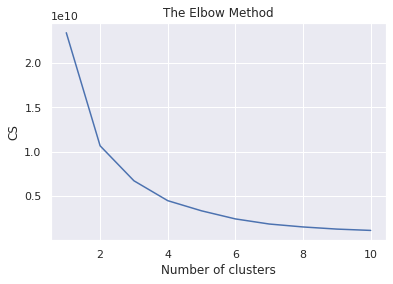

In [96]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [97]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


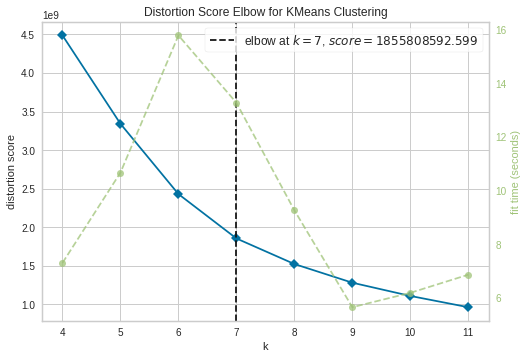

In [98]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [99]:
kmeans = KMeans(n_clusters=7, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 2776 out of 320348 samples were correctly labeled.
Accuracy score: 0.01


**AGGLOMERATIVE CLUSTERING**

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [101]:
df_processed = pd.read_csv('/data/processed_asylum_seekers.csv')
df_processed

year country_of_residence country_of_origin  \
0       2000             Zimbabwe       Afghanistan   
1       2000         South Africa       Afghanistan   
2       2000           Uzbekistan       Afghanistan   
3       2000                  USA       Afghanistan   
4       2000                  USA       Afghanistan   
...      ...                  ...               ...   
129715  2016                  USA          Zimbabwe   
129716  2016                  USA          Zimbabwe   
129717  2016         South Africa          Zimbabwe   
129718  2016         South Africa          Zimbabwe   
129719  2016               Zambia          Zimbabwe   

        total_applied_during_year  decisions_recognized  total_rejected  \
0                             5.0                   5.0             0.0   
1                             0.0                   0.0             0.0   
2                          2156.0                 747.0           112.0   
3                           225.0                 151.0            31.0   
4                           218.0                 182.0            51.0   
...                           ...                   ...             ...   
129715                      229.0                  16.0             0.0   
129716                       12.0                   0.0             0.0   
129717                        0.0                   0.0             0.0   
129718                     7964.0                  73.0          7869.0   
129719                        0.0                   0.0             0.0   

        decisions_closed  total_pending_year_start  total_pending_year_end  \
0                    0.0                       0.0                     0.0   
1                    0.0                       9.0                     8.0   
2                  327.0                     530.0                  2470.0   
3                   68.0                     196.0                   171.0   
4                   40.0                     193.0                   150.0   
...                  ...                       ...                     ...   
129715              10.0                     232.0                   435.0   
129716              23.0                     142.0                   138.0   
129717              94.0                     103.0                     0.0   
129718               0.0                   45362.0                 41260.0   
129719               0.0                       0.0                     0.0   

       application_authority stage_of_application Rejected(Y/N)  
0                          G                   FI             N  
1                          G                   FI             N  
2                          U                   FI             Y  
3                          G                   EO             Y  
4                          G                   IN             Y  
...                      ...                  ...           ...  
129715                     G                   IN             N  
129716                     G                   EO             N  
129717                     G                   AR             N  
129718                     G                   FI             Y  
129719                     G                   FI             N  

[129720 rows x 12 columns]

In [102]:
groups = df_processed.groupby('country_of_origin')

# Create an empty list to store the sample data
sample_data = []

# Iterate over the groups and sample 10 rows from each group
for name, group in groups:
    sample = group.sample(n=10, random_state=42,replace=True)
    sample_data.append(sample)

# Concatenate the sampled data into a single dataframe
sample = pd.concat(sample_data)

In [103]:
len(sample)

2210

In [104]:
X = sample.iloc[:, [3, 4]].values


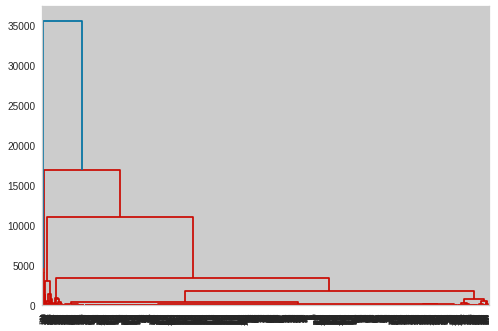

In [105]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))


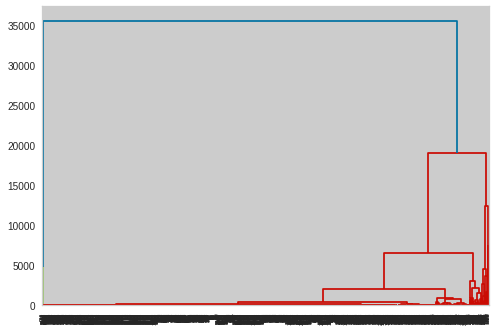

In [106]:
X1 = sample.iloc[:, [3, 5]].values
dendrogram1 = sch.dendrogram(sch.linkage(X1, method='ward'))


In [107]:

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

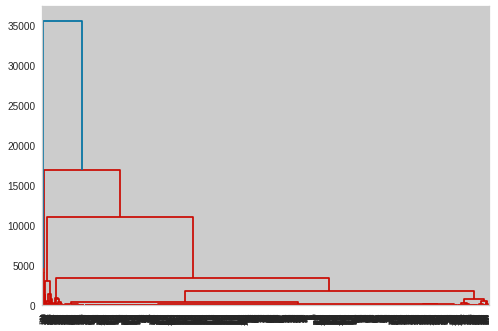

In [108]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))


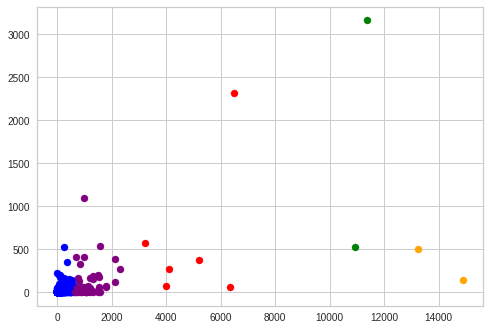

In [109]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [110]:
#---------------------------------------------
# Step 1: Import Libraries
#---------------------------------------------
# Data processing 
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset
from sklearn import datasets
# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
#---------------------------------------------
# Step 2: Read Data
#---------------------------------------------

In [111]:
df_processed.head()

year country_of_residence country_of_origin  total_applied_during_year  \
0  2000             Zimbabwe       Afghanistan                        5.0   
1  2000         South Africa       Afghanistan                        0.0   
2  2000           Uzbekistan       Afghanistan                     2156.0   
3  2000                  USA       Afghanistan                      225.0   
4  2000                  USA       Afghanistan                      218.0   

   decisions_recognized  total_rejected  decisions_closed  \
0                   5.0             0.0               0.0   
1                   0.0             0.0               0.0   
2                 747.0           112.0             327.0   
3                 151.0            31.0              68.0   
4                 182.0            51.0              40.0   

   total_pending_year_start  total_pending_year_end application_authority  \
0                       0.0                     0.0                     G   
1                       9.0                     8.0                     G   
2                     530.0                  2470.0                     U   
3                     196.0                   171.0                     G   
4                     193.0                   150.0                     G   

  stage_of_application Rejected(Y/N)  
0                   FI             N  
1                   FI             N  
2                   FI             Y  
3                   EO             Y  
4                   IN             Y

In [112]:
df_processed['year'].value_counts()

2015    11225
2016    10461
2014     9908
2013     9259
2012     8644
2011     8299
2010     7905
2009     7159
2008     7042
2007     6924
2005     6721
2006     6656
2004     6601
2003     6359
2002     5862
2001     5542
2000     5153
Name: year, dtype: int64

In [113]:
X_cluster_data = df_processed[df_processed.columns.difference(['year'])]
X_cluster_data = X_cluster_data.drop(['Rejected(Y/N)','application_authority','country_of_origin','country_of_residence','stage_of_application'],axis=1)

In [114]:
X_cluster_data.head()

decisions_closed  decisions_recognized  total_applied_during_year  \
0               0.0                   5.0                        5.0   
1               0.0                   0.0                        0.0   
2             327.0                 747.0                     2156.0   
3              68.0                 151.0                      225.0   
4              40.0                 182.0                      218.0   

   total_pending_year_end  total_pending_year_start  total_rejected  
0                     0.0                       0.0             0.0  
1                     8.0                       9.0             0.0  
2                  2470.0                     530.0           112.0  
3                   171.0                     196.0            31.0  
4                   150.0                     193.0            51.0

In [115]:
X_cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129720 entries, 0 to 129719
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   decisions_closed           129720 non-null  float64
 1   decisions_recognized       129720 non-null  float64
 2   total_applied_during_year  129720 non-null  float64
 3   total_pending_year_end     129720 non-null  float64
 4   total_pending_year_start   129720 non-null  float64
 5   total_rejected             129720 non-null  float64
dtypes: float64(6)
memory usage: 5.9 MB


In [116]:
#---------------------------------------------
# Step 4: Kmeans Clustering (Model 1)
#---------------------------------------------
# Kmeans model
kmeans = KMeans(n_clusters = 3,  random_state = 42)
# Fit and predict on the data
y_kmeans = kmeans.fit_predict(X_cluster_data)
# Save the predictions as a column
df_processed['y_kmeans']=y_kmeans
# Check the distribution
df_processed['y_kmeans'].value_counts()

0    129666
1        42
2        12
Name: y_kmeans, dtype: int64

**K Means segregates the unlabeled data into various groups, called clusters, based on having similar features, common patterns**

In [117]:
## K-MEANS CLUSTERING ON RESETTLEMENT DATA ##


import pandas as pd

df_demo = pd.read_csv('/data/resettlement.csv')

df_demo.head()



Country / territory of asylum/residence    Origin  Year Value
0                                  Canada   Albania  1959    17
1                                  Canada   Austria  1959    17
2                                  Canada   Belgium  1959     2
3                                  Canada  Bulgaria  1959    35
4                                  Canada     China  1959     2

In [118]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [119]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_demo['Origin'] = labelencoder.fit_transform(df_demo['Origin'])
df_demo

df_demo.drop(df_demo[df_demo['Value'] == '*'].index, inplace = True)
df_demo.head()

Country / territory of asylum/residence  Origin  Year Value
0                                  Canada       1  1959    17
1                                  Canada       8  1959    17
2                                  Canada      15  1959     2
3                                  Canada      25  1959    35
4                                  Canada      35  1959     2

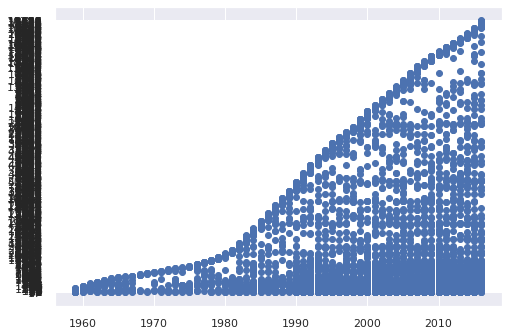

In [120]:
plt.scatter(df_demo['Year'],df_demo['Value'])

plt.show()

In [121]:
## SELECTING THE FEATURE ###
X = df_demo.iloc[:,2:4] # 1t for rows and second for columns
X

Year Value
0     1959    17
1     1959    17
2     1959     2
3     1959    35
4     1959     2
...    ...   ...
9069  2016  3642
9070  2016    46
9071  2016    57
9072  2016    27
9074  2016    11

[8918 rows x 2 columns]

In [122]:
## K-Means Clustering ###
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [123]:
### CLUSTERING RESULTS ###
identified_clusters = kmeans.fit_predict(X)
identified_clusters


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

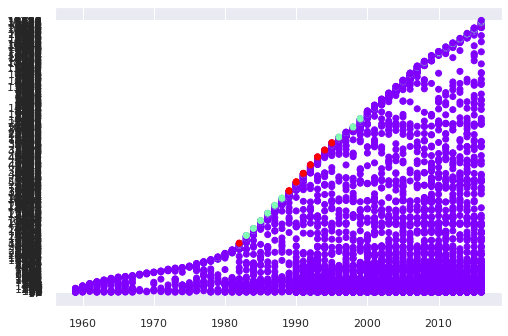

In [124]:
data_with_clusters = df_demo.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Year'],data_with_clusters['Value'],c=data_with_clusters['Clusters'],cmap='rainbow')


Text(0, 0.5, 'WCSS')

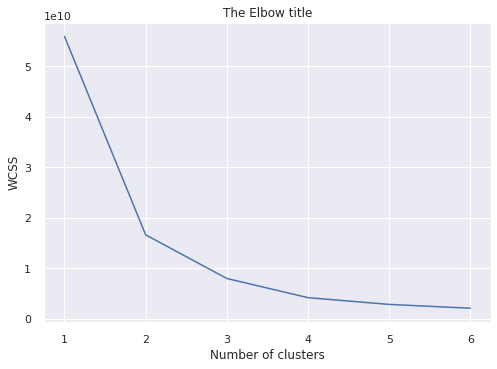

In [125]:
### Trying different method ( to find no .of clusters to be selected) ####
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [126]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


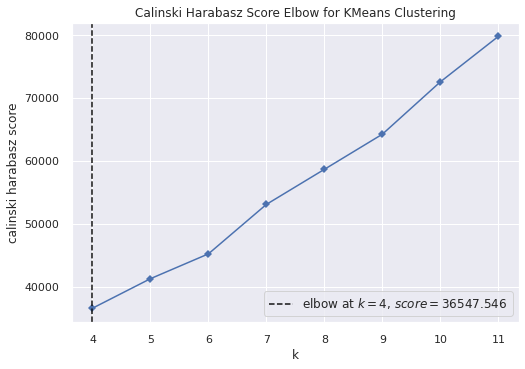

In [127]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

**HIERARCHICAL CLUSTERING ON RESETTLEMENT DATA:**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
### NORMALIZING THE DATA ####
from sklearn.preprocessing import normalize
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

Year     Value
0  0.999962  0.008678
1  0.999962  0.008678
2  0.999999  0.001021
3  0.999840  0.017863
4  0.999999  0.001021

In [130]:
### Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem: ####

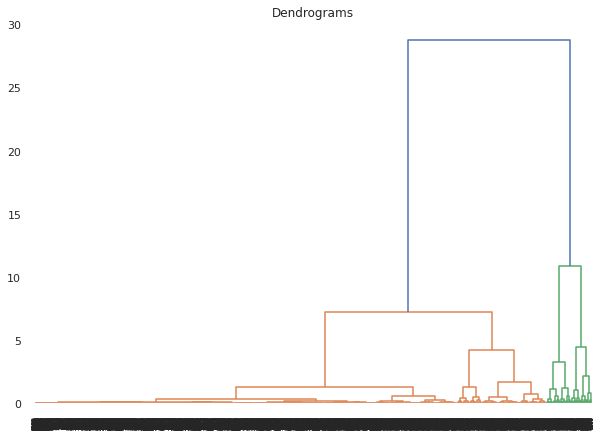

In [131]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

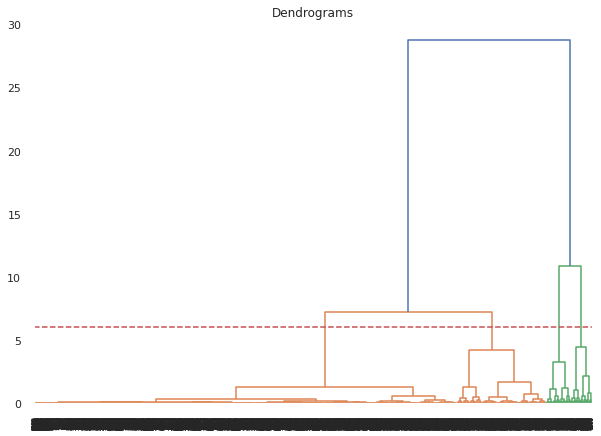

In [132]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [133]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([3, 3, 3, ..., 3, 3, 3])

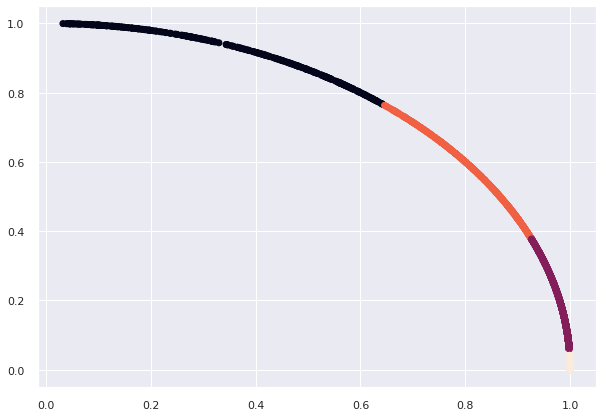

In [134]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Year'], data_scaled['Value'], c=cluster.labels_) 